In [2]:
import numpy as np
from matplotlib import pyplot as plt

import h5py
import cv2

/home/clemens/.anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Get all Variances

In [3]:
#All Parameters
source_dataset = "../Datasets/Dataset_forumtracking.hdf5"
final_dataset = "forumtracking_variances.hdf5"

max_trajectory_length = 100
max_nr_trajectories = 100
filter_parameter = ("", 3)
goals = [el for el in range(1,9)]

%run preprocessing.py
# defines:
# filter_by_origin(path, goal, target=None)
# filter_by_length(path, length, target=None)
# filter_by_number(path, number, target=None)
# filter_trajectory(data, kind=None, windowsize=3)
# adjust_trajectory_length(trajectory, length)
# dp_algorithm(tolerance, trajectory)
# dp_cost_function(tolerance, trajectory)
# process_trajectory(trajectory, length, filter_parameter)

In [21]:
x_std, y_std = [], []

for origin in [str(el) for el in range(1,9)]:
    print("Origin: ",origin)
    filter_by_origin(source_dataset, origin, target="forumtracking_reduced.hdf5")
    filter_by_length("forumtracking_reduced.hdf5", max_trajectory_length, target=final_dataset)
    #filter_by_number("forumtracking_short.hdf5", max_nr_trajectories, target=final_dataset)
    os.remove("forumtracking_reduced.hdf5")

    img_forum = cv2.imread("../Datasets/Images/forumtracking.png")

    i = 0
    with h5py.File(final_dataset, "r") as f:
        count_total = f.attrs["TotalNrTrajectories"]
        X_forum = np.zeros((count_total, max_trajectory_length,2))
        y_forum = np.zeros((count_total,))
        for goal in f:
            for traj in f[goal]:
                trajectory = process_trajectory(f[goal+"/"+traj+"/Positions"][:], \
                                                      max_trajectory_length, \
                                                      filter_parameter)
                X_forum[i] = trajectory
                y_forum[i] = int(goal)
                i += 1

    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    tmp_x_std, tmp_y_std = [], []

    for goal in goals:
        x_tmp = X_forum[np.where(y_forum == goal)][:,:,0]
        y_tmp = X_forum[np.where(y_forum == goal)][:,:,1]
        tmp_x_std.append(np.std(x_tmp,axis=0))
        tmp_y_std.append(np.std(y_tmp,axis=0))
    x_std.append(tmp_x_std)
    y_std.append(tmp_y_std)
print("Done")

Origin:  1
Origin:  2
Origin:  3


/home/clemens/.anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Origin:  4
hua
Origin:  5
Origin:  6
Origin:  7
Origin:  8
Done


In [110]:
np.save("x_std.npy", x_std)
np.save("y_std.npy",y_std)

In [ ]:
############################################################

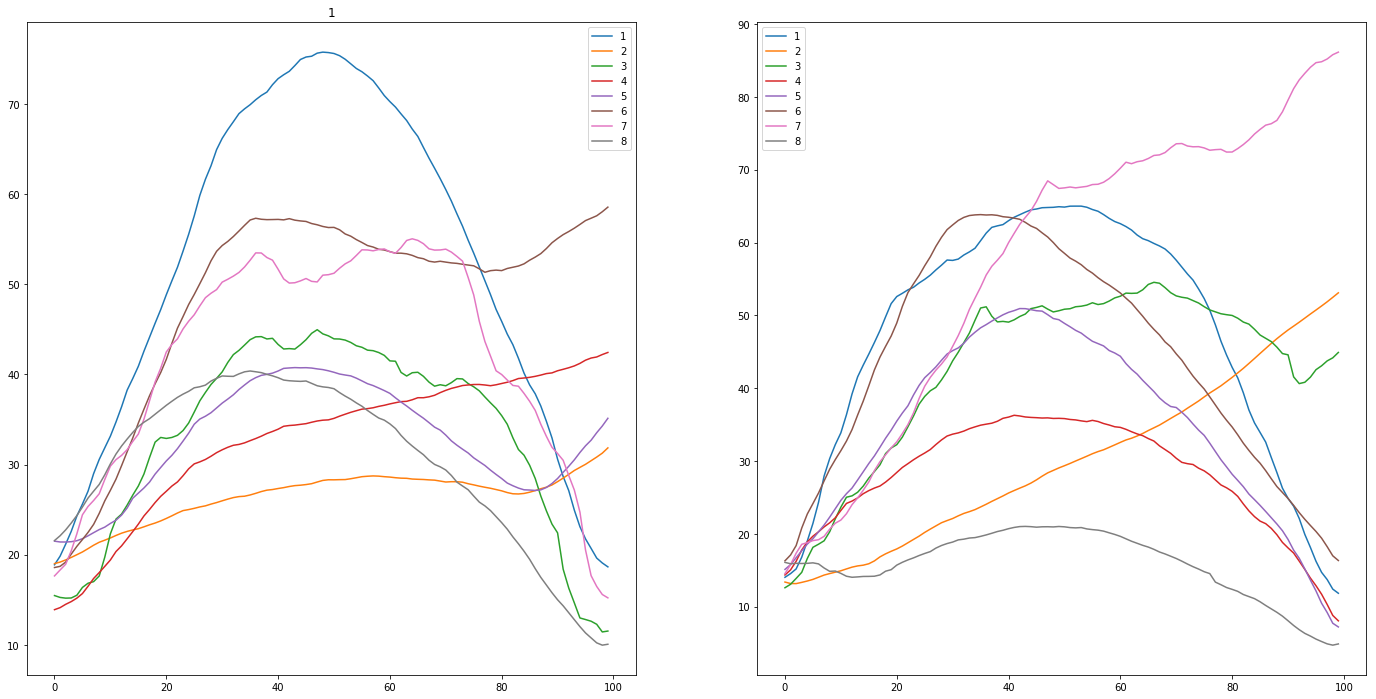

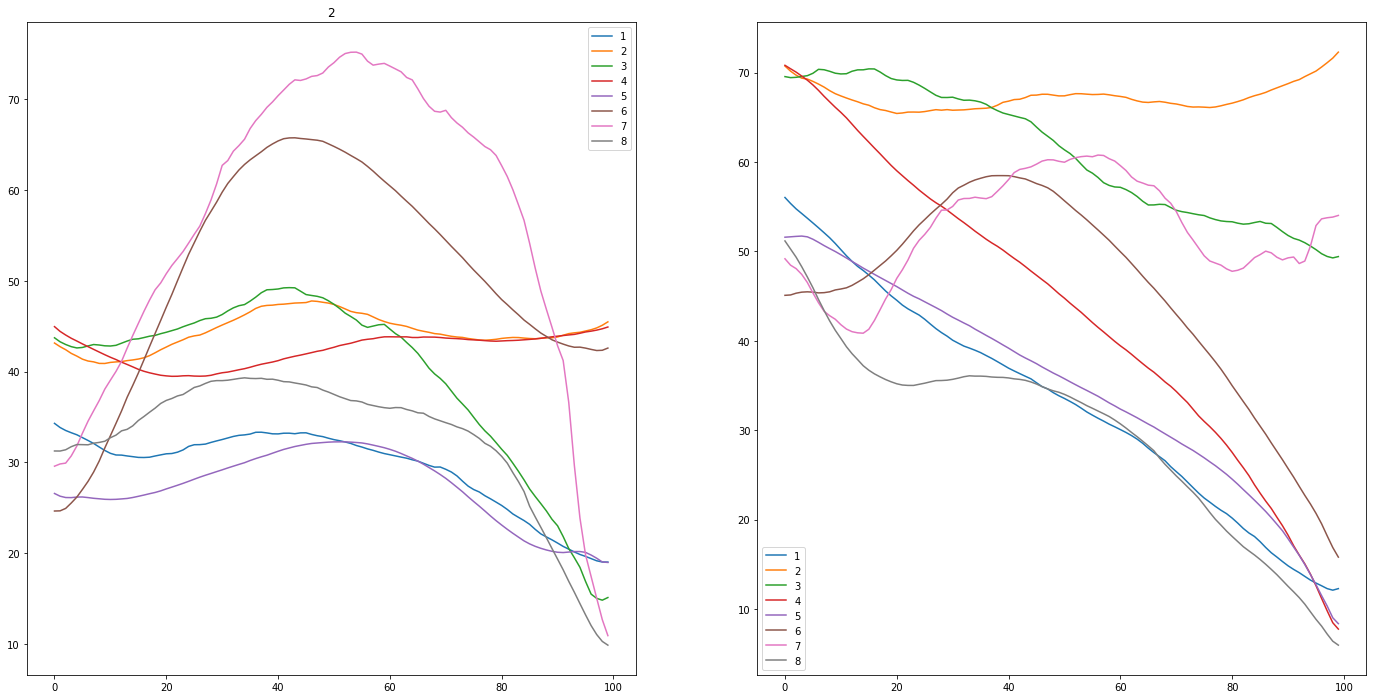

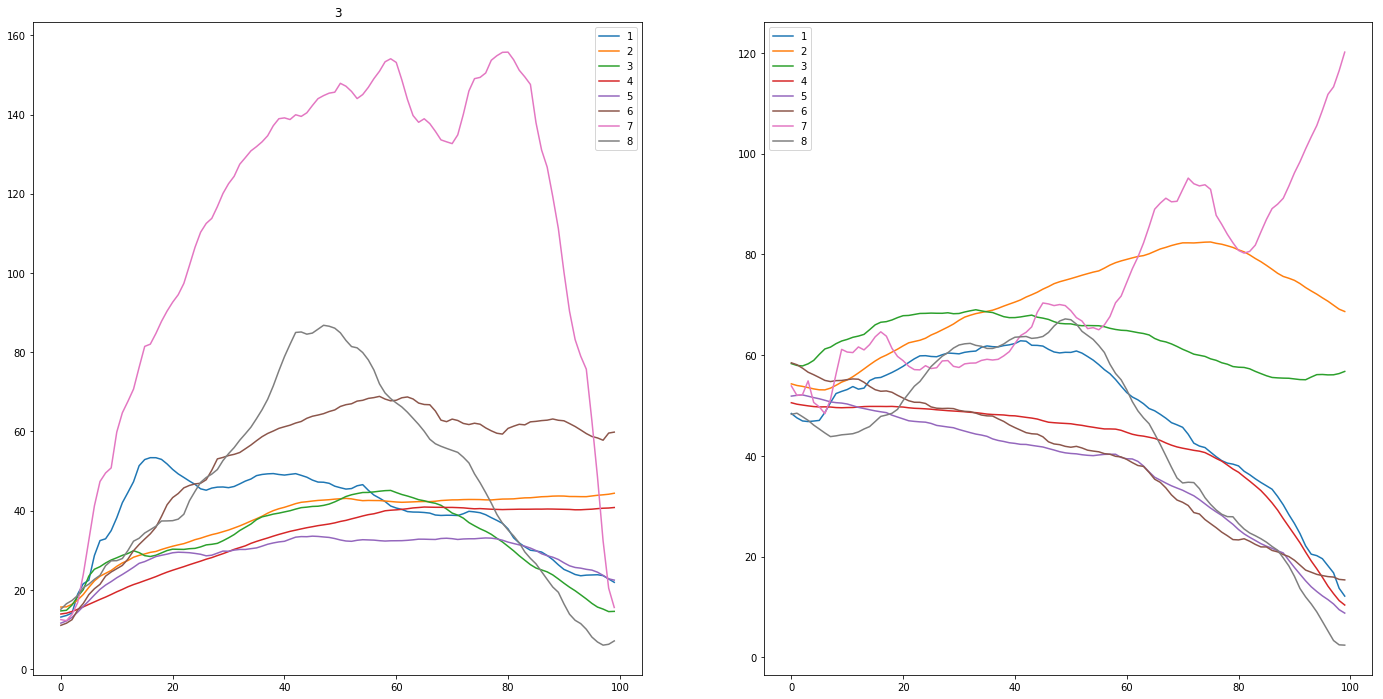

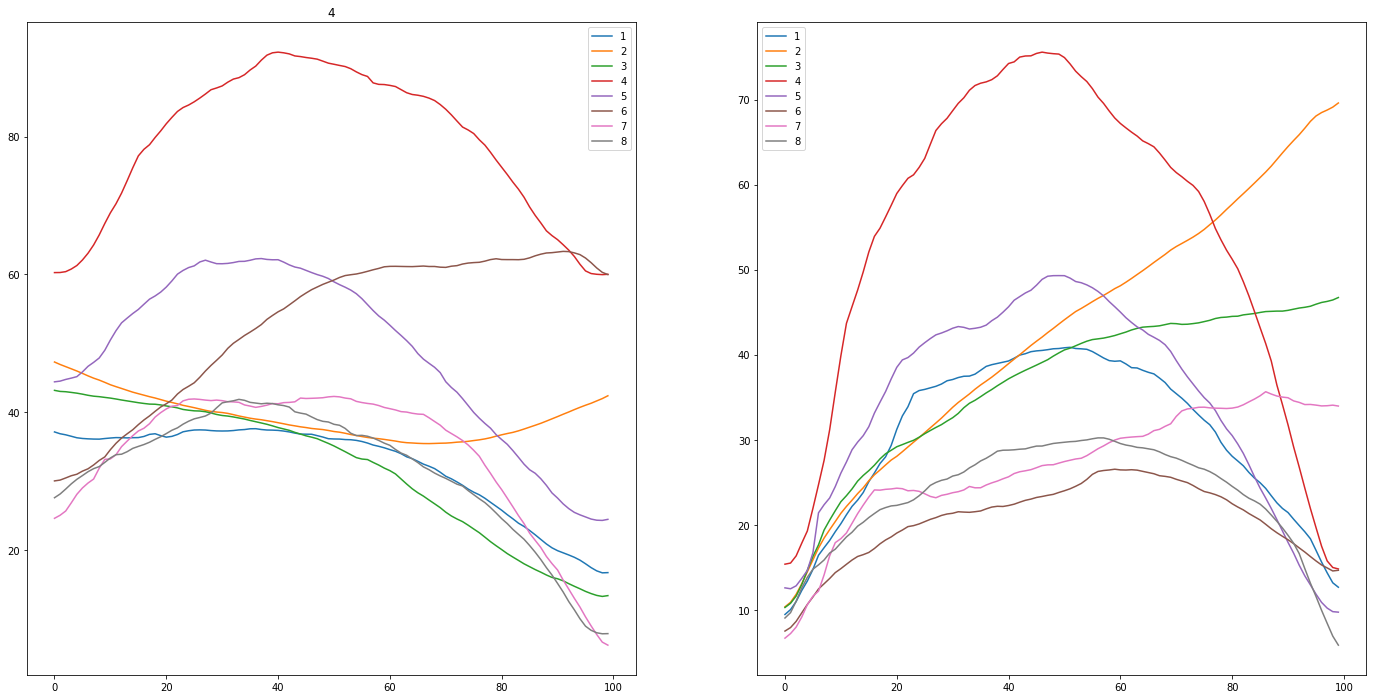

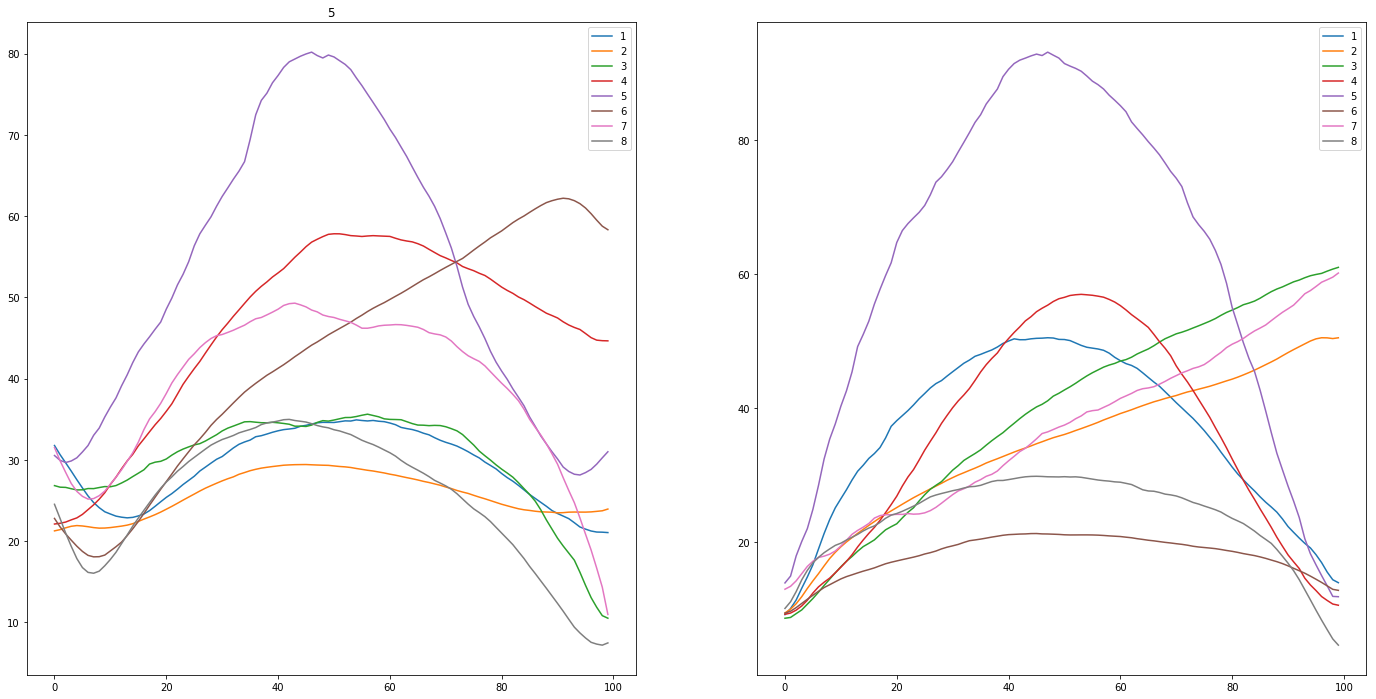

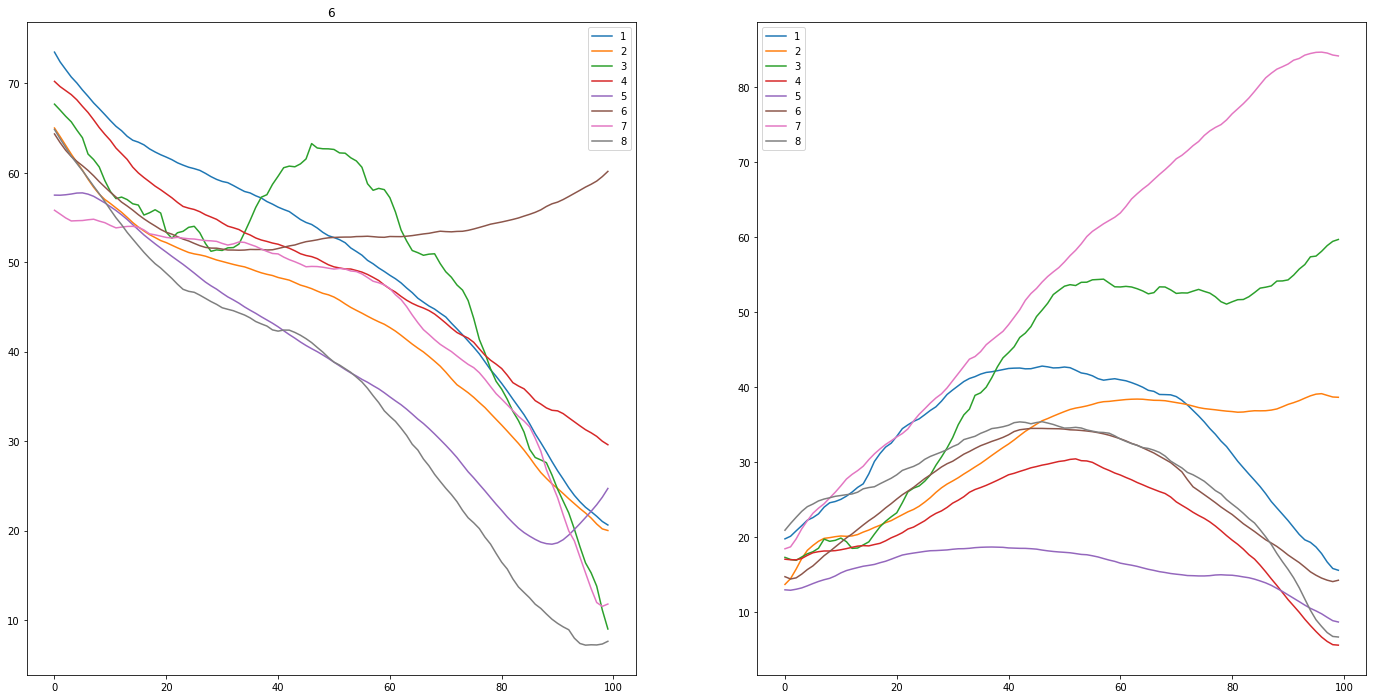

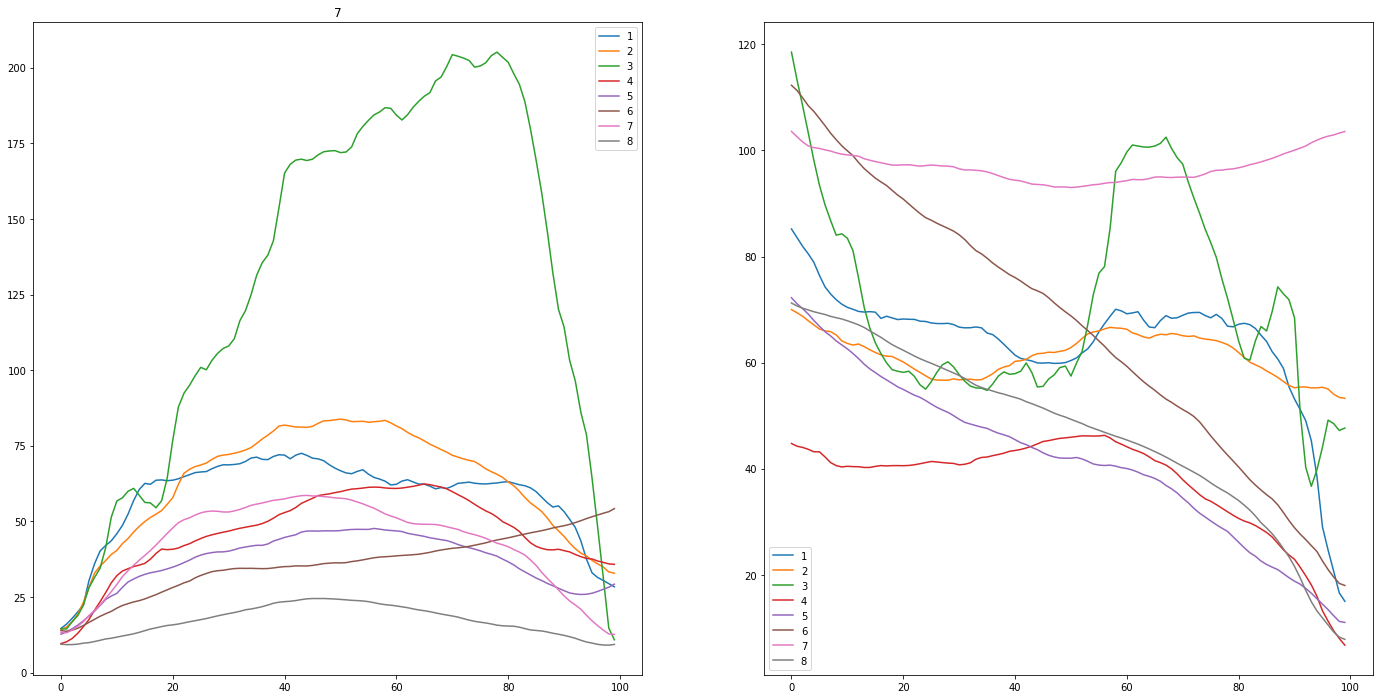

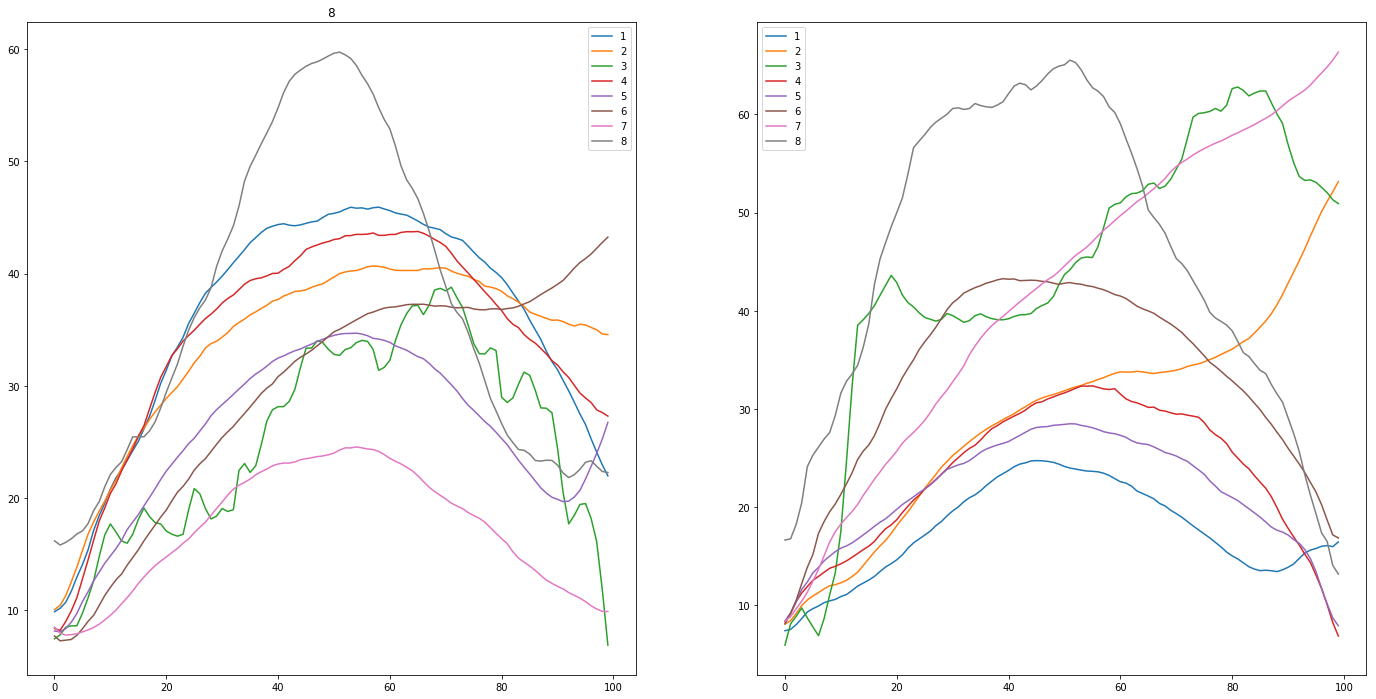

In [3]:
x_std = np.load("x_std.npy")
y_std = np.load("y_std.npy")

for i in range(8):
    fig = plt.figure(figsize=(24,12))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    for j in range(8):
        ax1.plot(x_std[i][j],label=str(j+1))
        ax2.plot(y_std[i][j],label=str(j+1))
    ax1.set_title(str(i+1))
    ax1.legend()
    ax2.legend()
plt.show()
    

## Über alle Ziel-Goals gemittelt

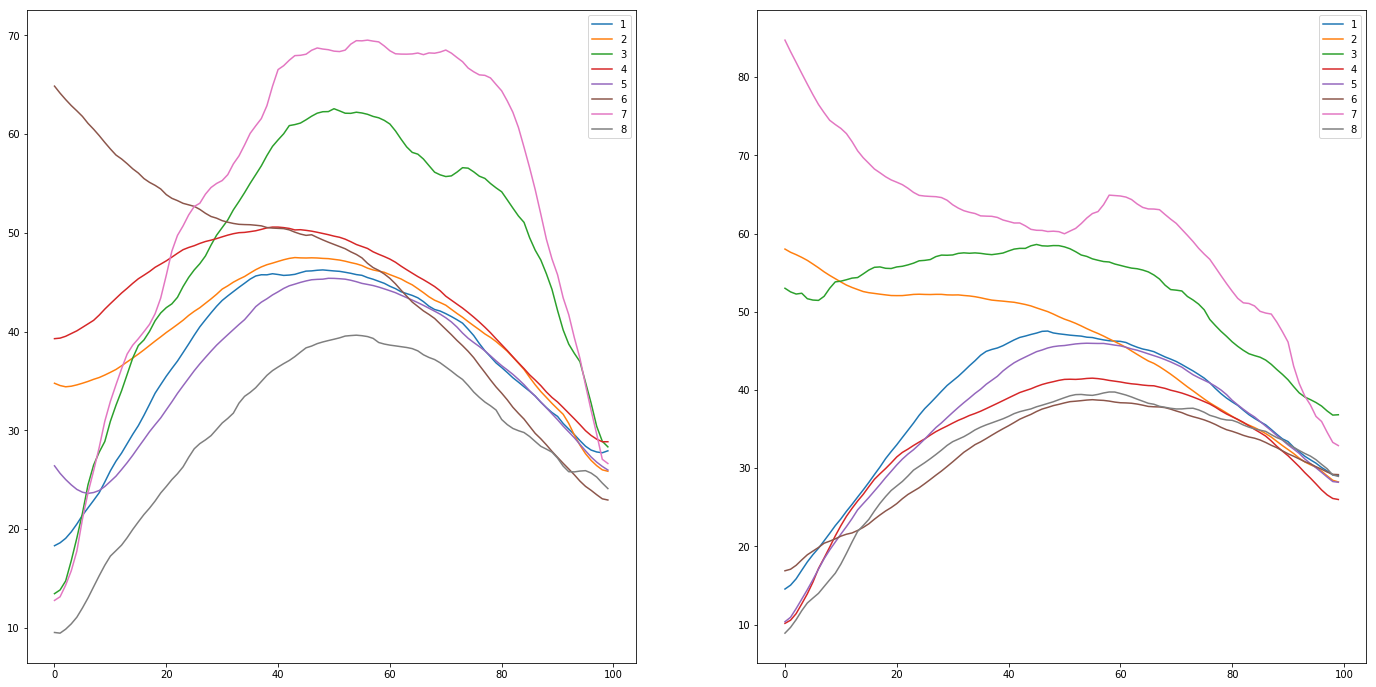

In [5]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(8):

    tmp_x = np.zeros((100,8))
    tmp_y = np.zeros((100,8))
    for j in range(8):
        tmp_x[:,j] = x_std[i][j]
        tmp_y[:,j] = y_std[i][j]
    mx = np.mean(tmp_x,axis=1)
    my = np.mean(tmp_y,axis=1)
    ax1.plot(mx,label=str(i+1))
    ax2.plot(my,label=str(i+1))
    #ax1.set_title(str(i+1))
    ax1.legend()
    ax2.legend()
plt.show()

## Über alle Ziel und Origins gemittelt

(100,)


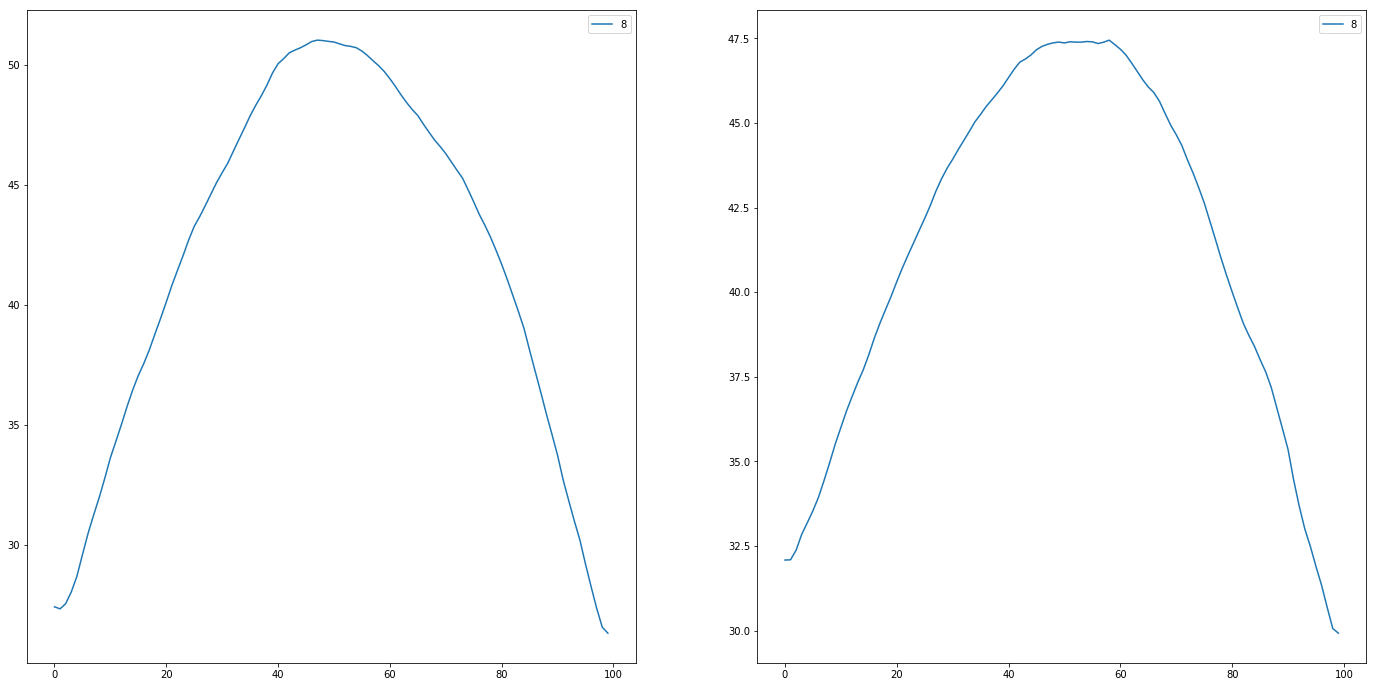

In [16]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x, y = [], []
for i in range(8):
    tmp_xx = np.zeros((100,8))
    tmp_yy = np.zeros((100,8))
    for j in range(8):
        tmp_xx[:,j] = x_std[i][j]
        tmp_yy[:,j] = y_std[i][j]
    x.append(np.mean(tmp_xx,axis=1))
    y.append(np.mean(tmp_yy,axis=1))

x = np.mean(np.array(x), axis=0)
y = np.mean(np.array(y), axis=0)
print(x.shape)
ax1.plot(x,label=str(i+1))
ax2.plot(y,label=str(i+1))
#ax1.set_title(str(i+1))
ax1.legend()
ax2.legend()
plt.show()
np.save("x_std_mean.npy", x)
np.save("y_std_mean.npy",y)

Origin:  4
Done


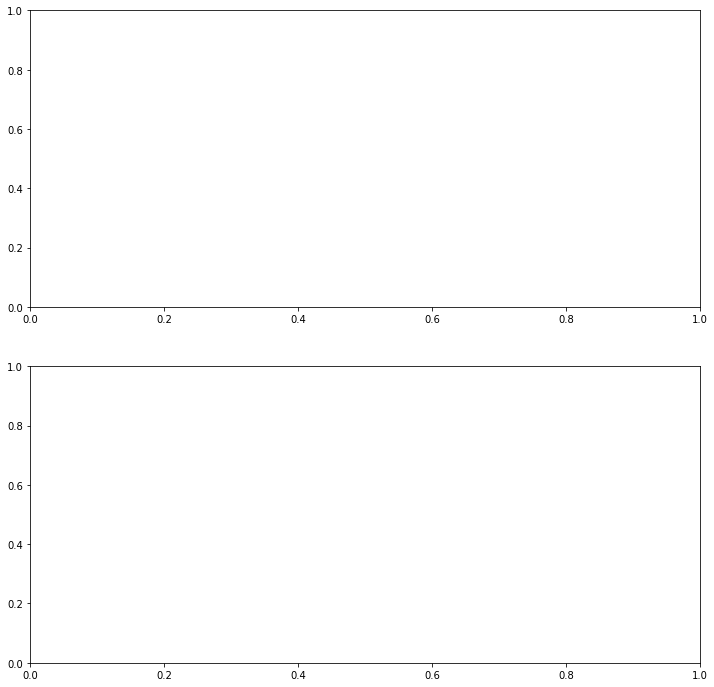

In [4]:
x_std, y_std = [], []

for origin in ["4"]:
    print("Origin: ",origin)
    filter_by_origin(source_dataset, origin, target="forumtracking_reduced.hdf5")
    filter_by_length("forumtracking_reduced.hdf5", max_trajectory_length, target=final_dataset)
    #filter_by_number("forumtracking_short.hdf5", max_nr_trajectories, target=final_dataset)
    os.remove("forumtracking_reduced.hdf5")

    img_forum = cv2.imread("../Datasets/Images/forumtracking.png")

    i = 0
    with h5py.File(final_dataset, "r") as f:
        count_total = f.attrs["TotalNrTrajectories"]
        X_forum = np.zeros((count_total, max_trajectory_length,2))
        y_forum = np.zeros((count_total,))
        for goal in f:
            for traj in f[goal]:
                trajectory = process_trajectory(f[goal+"/"+traj+"/Positions"][:], \
                                                      max_trajectory_length, \
                                                      filter_parameter)
                X_forum[i] = trajectory
                y_forum[i] = int(goal)
                i += 1
    tmp_x_std, tmp_y_std = [], []

    for goal in goals:
        x_tmp = X_forum[np.where(y_forum == goal)][:,:,0]
        y_tmp = X_forum[np.where(y_forum == goal)][:,:,1]
        tmp_x_std.append(np.std(x_tmp,axis=0))
        tmp_y_std.append(np.std(y_tmp,axis=0))
    x_std.append(tmp_x_std)
    y_std.append(tmp_y_std)
print("Done")

[[array([37.11562083, 36.85390507, 36.69854604, 36.48711669, 36.27023919,
       36.16677452, 36.1137434 , 36.07972352, 36.06911796, 36.15791905,
       36.23179596, 36.29363461, 36.28027751, 36.25080397, 36.27887983,
       36.29533207, 36.45987441, 36.76341619, 36.85300985, 36.5796128 ,
       36.35931266, 36.47200828, 36.74379718, 37.13678971, 37.28933605,
       37.39424266, 37.41526409, 37.39081553, 37.31242075, 37.26381719,
       37.24960081, 37.2619834 , 37.31730483, 37.41249836, 37.46196871,
       37.57241467, 37.58625791, 37.46740535, 37.39382062, 37.3778813 ,
       37.33887421, 37.24379527, 37.11759187, 36.94639821, 36.80820109,
       36.7880221 , 36.7787177 , 36.57863151, 36.37618   , 36.13281251,
       36.09280315, 36.07932576, 36.00825673, 35.98316681, 35.88818782,
       35.72791629, 35.50259735, 35.21519939, 35.0278778 , 34.81204177,
       34.55044433, 34.30429509, 33.96028865, 33.50342243, 33.23729763,
       32.85286367, 32.44345698, 32.13964251, 31.79222892, 31.

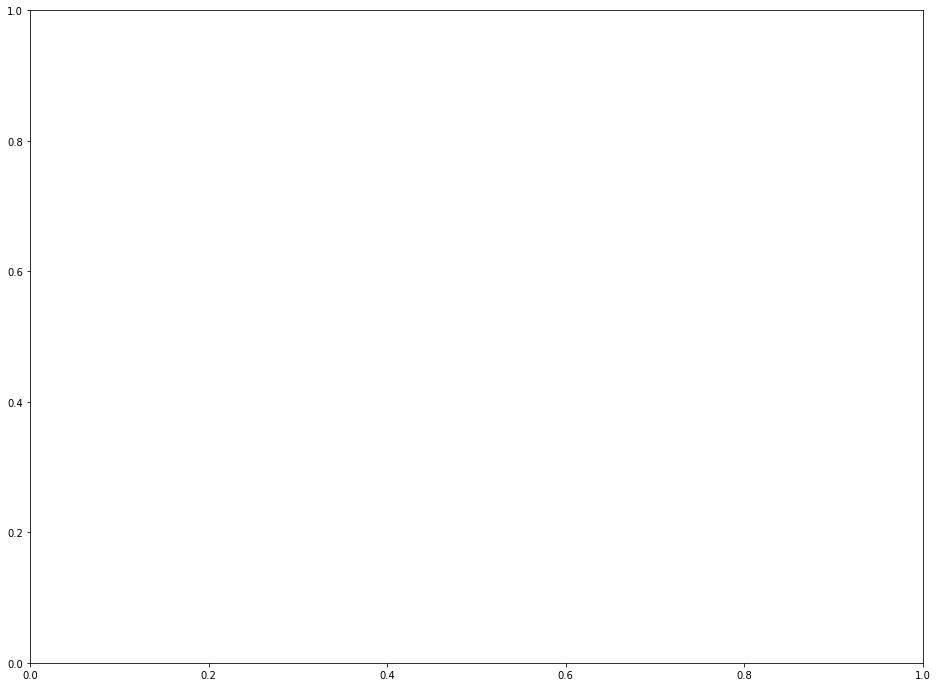

In [6]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
print(x_std)